## 50 Startups Predictions using Regression algorithms

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
df = pd.read_csv("E:/Exposys Data labs/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [3]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

**There are no null values so we can start with spliting the data into train and test dataset.**

In [4]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df[['Profit']]

In [5]:
print(X.shape)
print(y.shape)

(50, 3)
(50, 1)


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train ,y_test = train_test_split(X,y)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 3)
(13, 3)
(37, 1)
(13, 1)


In [8]:
y_test[0:10]

,Profit
9,149759.96
4,166187.94
16,126992.93
34,96712.80
12,141585.52
40,78239.91
46,49490.75
8,152211.77
10,146121.95
38,81229.06


### Linear Regression Algorithm

In [9]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [10]:
print("Coefficient:",lin.coef_)
print("Intercept:",lin.intercept_)

Coefficient: [[ 0.84158178 -0.01151763  0.01916807]]
Intercept: [46985.06267155]


In [11]:
predicted_values = lin.predict(X_test)
predicted_values[0:10]

array([[155375.63258322],
       [172546.13563278],
       [116305.96240967],
       [ 88280.72112345],
       [129301.59483285],
       [ 73130.97253368],
       [ 52453.31213318],
       [152691.58614135],
       [135872.04456265],
       [ 66801.52741019]])

In [12]:
print("Train score:",lin.score(X_train,y_train))
print("Test Score:",lin.score(X_test,y_test))

Train score: 0.9539670032442588
Test Score: 0.9263873319485134


In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE_LR = mean_squared_error(y_test,predicted_values)
MAE_LR = mean_squared_error(y_test,predicted_values)
RMSE_LR = np.sqrt(MSE_LR)

In [14]:
print("Mean squared error for Linear regression algorithm:",MSE_LR)
print("Mean Absolute error for Linear regression algorithm:",MAE_LR)
print("Root Mean Squared error for Linear regression algorithm:",RMSE_LR)

Mean squared error for Linear regression algorithm: 88568740.6283923
Mean Absolute error for Linear regression algorithm: 88568740.6283923
Root Mean Squared error for Linear regression algorithm: 9411.096675116683


In [15]:
LR_score = r2_score(y_test,predicted_values)
LR_score

0.9263873319485134

### Ridge Regression Algorithm

In [16]:
from sklearn.linear_model import Ridge
ridge =  Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [17]:
print("Coefficient:",ridge.coef_)
print("Intercept:",ridge.intercept_)

Coefficient: [[ 0.84158178 -0.01151763  0.01916807]]
Intercept: [46985.06267019]


In [18]:
predicted_values_RR = ridge.predict(X_test)
predicted_values_RR[0:10]

array([[155375.63258203],
       [172546.13563124],
       [116305.9624101 ],
       [ 88280.72112515],
       [129301.59483255],
       [ 73130.97253504],
       [ 52453.31213705],
       [152691.58614101],
       [135872.04456151],
       [ 66801.52741119]])

In [19]:
print("Train score:",ridge.score(X_train,y_train))
print("Test Score:",ridge.score(X_test,y_test))

Train score: 0.9539670032442586
Test Score: 0.9263873319566358


In [20]:
MSE_RR = mean_squared_error(y_test,predicted_values_RR)
MAE_RR = mean_squared_error(y_test,predicted_values_RR)
RMSE_RR = np.sqrt(MSE_LR)

In [21]:
print("Mean squared error for Ridge regression algorithm:",MSE_RR)
print("Mean Absolute error for Ridge regression algorithm:",MAE_RR)
print("Root Mean Squared error for Ridge regression algorithm:",RMSE_RR)

Mean squared error for Ridge regression algorithm: 88568740.61861975
Mean Absolute error for Ridge regression algorithm: 88568740.61861975
Root Mean Squared error for Ridge regression algorithm: 9411.096675116683


In [22]:
RR_score = r2_score(y_test,predicted_values_RR)
RR_score 

0.9263873319566358

### Lasso Regression Algorithm

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [24]:
print("Coefficient:",lasso.coef_)
print("Intercept:",lasso.intercept_)

Coefficient: [ 0.84158178 -0.01151763  0.01916807]
Intercept: [46985.06258987]


In [25]:
predicted_values_LAR = lasso.predict(X_test)
predicted_values_LAR[0:10]

array([155375.63261266, 172546.13565212, 116305.96238992,  88280.72109823,
       129301.59485145,  73130.97247617,  52453.31196028, 152691.58618505,
       135872.04459675,  66801.52730158])

In [26]:
print("Train score:",lasso.score(X_train,y_train))
print("Test Score:",lasso.score(X_test,y_test))

Train score: 0.9539670032442586
Test Score: 0.9263873314307618


In [27]:
MSE_LAR = mean_squared_error(y_test,predicted_values_LAR)
MAE_LAR = mean_squared_error(y_test,predicted_values_LAR)
RMSE_LAR = np.sqrt(MSE_LAR)

In [28]:
print("Mean squared error for Lasso regression algorithm:",MSE_LAR)
print("Mean Absolute error for Lasso regression algorithm:",MAE_LAR)
print("Root Mean Squared error for Lasso regression algorithm:",RMSE_LAR)

Mean squared error for Lasso regression algorithm: 88568741.2513369
Mean Absolute error for Lasso regression algorithm: 88568741.2513369
Root Mean Squared error for Lasso regression algorithm: 9411.096708212965


In [29]:
LAR_score = r2_score(y_test,predicted_values_LAR)
LAR_score

0.9263873314307618

### Elastic Net Regression Algorithm

In [30]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(X_train,y_train)

ElasticNet()

In [31]:
print("Coefficient:",elastic_net.coef_)
print("Intercept:",elastic_net.intercept_)

Coefficient: [ 0.84158178 -0.01151763  0.01916807]
Intercept: [46985.06259216]


In [32]:
predicted_values_ENR = elastic_net.predict(X_test)
predicted_values_ENR[0:10]

array([155375.63256428, 172546.13559882, 116305.96241192,  88280.72115908,
       129301.5948336 ,  73130.97254349,  52453.31215675, 152691.58615337,
       135872.04454729,  66801.52738436])

In [33]:
print("Train score:",elastic_net.score(X_train,y_train))
print("Test Score:",elastic_net.score(X_test,y_test))

Train score: 0.9539670032442586
Test Score: 0.9263873319205858


In [34]:
MSE_ENR = mean_squared_error(y_test,predicted_values_ENR)
MAE_ENR = mean_squared_error(y_test,predicted_values_ENR)
RMSE_ENR = np.sqrt(MSE_ENR)

In [35]:
print("Mean squared error for Lasso regression algorithm:",MSE_ENR)
print("Mean Absolute error for Lasso regression algorithm:",MAE_ENR)
print("Root Mean Squared error for Lasso regression algorithm:",RMSE_ENR)

Mean squared error for Lasso regression algorithm: 88568740.66199419
Mean Absolute error for Lasso regression algorithm: 88568740.66199419
Root Mean Squared error for Lasso regression algorithm: 9411.09667690191


In [36]:
ENR_score = r2_score(y_test,predicted_values_ENR)
ENR_score

0.9263873319205858

### Support Vector regressor Algorithm

In [37]:
from sklearn.svm import SVR 
svr = SVR(kernel='linear') 
svr.fit(X_train,y_train) 

SVR(kernel='linear')

In [38]:
print("Coefficient:",svr.coef_)
print("Intercept:",svr.intercept_)

Coefficient: [[0.97475992 0.06513406 0.01905855]]
Intercept: [30723.4595925]


In [39]:
predicted_values_SVR = svr.predict(X_test)
predicted_values_SVR[0:10]

array([163836.57907645, 182175.35378806, 119725.7061669 ,  90266.47418753,
       135272.5509011 ,  69766.64764945,  45211.86713187, 163849.04183737,
       141635.16325919,  58268.79318778])

In [40]:
print("Train score:",svr.score(X_train,y_train))
print("Test Score:",svr.score(X_test,y_test))

Train score: 0.9230196994607466
Test Score: 0.8277782610994939


In [41]:
MSE_SVR = mean_squared_error(y_test,predicted_values_SVR)
MAE_SVR = mean_squared_error(y_test,predicted_values_SVR)
RMSE_SVR = np.sqrt(MSE_ENR)

In [42]:
SVR_score = r2_score(y_test,predicted_values_SVR)
SVR_score

0.8277782610994939

### Decision Tree Regressor Algorithm

In [43]:
from sklearn.tree import DecisionTreeRegressor 
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [44]:
predicted_values_DTR = DTR.predict(X_test)
predicted_values_DTR[0:10]

array([156991.12, 156991.12, 111313.02,  96479.51, 129917.04,  90708.19,
        69758.98, 125370.37, 129917.04,  71498.49])

In [45]:
print("Train score:",DTR.score(X_train,y_train))
print("Test Score:",DTR.score(X_test,y_test))

Train score: 1.0
Test Score: 0.8511432543536505


In [46]:
MSE_DTR = mean_squared_error(y_test,predicted_values_DTR)
MAE_DTR = mean_squared_error(y_test,predicted_values_DTR)
RMSE_DTR = np.sqrt(MSE_DTR)

In [47]:
DTR_score = r2_score(y_test,predicted_values_DTR)
DTR_score

0.8511432543536505

### Random Forrest Regressor Algorithm

In [48]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state = 0)
RFR.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [49]:
predicted_values_RFR = RFR.predict(X_test)
predicted_values_RFR[0:10]

array([146457.3604, 168421.306 , 115010.6291,  94594.7684, 132181.5484,
        82692.8431,  60660.0496, 142125.2602, 136495.0184,  72659.7386])

In [50]:
print("Train score:",RFR.score(X_train,y_train))
print("Test Score:",RFR.score(X_test,y_test))

Train score: 0.9883903760207625
Test Score: 0.9471039315439651


In [51]:
MSE_RFR = mean_squared_error(y_test,predicted_values_RFR)
MAE_RFR = mean_squared_error(y_test,predicted_values_RFR)
RMSE_RFR = np.sqrt(MSE_RFR)

In [52]:
RFR_score = r2_score(y_test,predicted_values_RFR)
RFR_score

0.9471039315439651

### Gradient Boosting Regressor Algorithm

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state = 0)
GBR.fit(X_train,y_train)

GradientBoostingRegressor(random_state=0)

In [54]:
predicted_values_GBR = GBR.predict(X_test)
predicted_values_GBR[0:10]

array([154481.2977341 , 168711.31499225, 112959.37189396,  97493.49024188,
       132670.44103907,  87345.97091729,  63676.9309696 , 132957.99037655,
       133497.08360501,  56543.51633607])

In [55]:
print("Train score:",GBR.score(X_train,y_train))
print("Test Score:",GBR.score(X_test,y_test))

Train score: 0.9999527462397211
Test Score: 0.8806478515396146


In [56]:
MSE_GBR = mean_squared_error(y_test,predicted_values_GBR)
MAE_GBR = mean_squared_error(y_test,predicted_values_GBR)
RMSE_GBR = np.sqrt(MSE_GBR)

In [57]:
GBR_score = r2_score(y_test,predicted_values_GBR)
GBR_score

0.8806478515396146

We have applied 8 regression algorithms in the dataset .Those are
- **Linear Regression**
- **Ridge Regression**
- **Lasso Regression**
- **Elastic net Regression**
- **Support Vector Regressor**
- **Decision Tree Regressor**
- **Random Forest Regressor**
- **Gradient Boosting Regressor**

Lets make a tabular form of the following results that we have got so we would have a better explaination of which algorithm is to be considered. 

In [58]:
x = {"Linear Regression":lin.score(X_train,y_train),
    "Ridge Regression":ridge.score(X_train,y_train),
    "Lasso Regression":lasso.score(X_train,y_train),
    "Elastic net Regression":elastic_net.score(X_train,y_train),
    "Support Vector Regressor":svr.score(X_train,y_train),
    "Decision Tree Regressor":DTR.score(X_train,y_train),
    "Random Forest Regressor":RFR.score(X_train,y_train),
    "Gradient Boosting Regressor":GBR.score(X_train,y_train)}
y = {"Linear Regression":LR_score,
    "Ridge Regression":RR_score,
    "Lasso Regression":LAR_score,
    "Elastic net Regression":ENR_score,
    "Support Vector Regressor":SVR_score,
    "Decision Tree Regressor":DTR_score,
    "Random Forest Regressor":RFR_score,
    "Gradient Boosting Regressor":GBR_score}
z = {"Linear Regression": MSE_LR,
    "Ridge Regression": MSE_RR,
    "Lasso Regression": MSE_LAR,
    "Elastic net Regression":MSE_ENR,
    "Support Vector Regressor":MSE_SVR,
    "Decision Tree Regressor":MSE_DTR,
    "Random Forest Regressor":MSE_RFR,
    "Gradient Boosting Regressor":MSE_GBR}
u = {"Linear Regression":MAE_LR,
    "Ridge Regression":MAE_RR,
    "Lasso Regression":MAE_LAR,
    "Elastic net Regression":MAE_ENR,
    "Support Vector Regressor":MAE_SVR,
    "Decision Tree Regressor":MAE_DTR,
    "Random Forest Regressor":MAE_RFR,
    "Gradient Boosting Regressor":MAE_GBR}
v = {"Linear Regression":RMSE_LR,
    "Ridge Regression":RMSE_RR,
    "Lasso Regression":RMSE_LAR,
    "Elastic net Regression":RMSE_ENR,
    "Support Vector Regressor":RMSE_SVR,
    "Decision Tree Regressor":RMSE_DTR,
    "Random Forest Regressor":RMSE_RFR,
    "Gradient Boosting Regressor":RMSE_GBR}

k = pd.Series(x)
l = pd.Series(y)
m = pd.Series(z)
n = pd.Series(u)
v = pd.Series(v)

table = pd.DataFrame({"Train Score":k,"Accuracy":l,"MSE":m,"MAE":n,"RMSE":v})
table

,Train Score,Accuracy,MSE,MAE,RMSE
Linear Regression,0.953967,0.926387,8.856874e+07,8.856874e+07,9411.096675
Ridge Regression,0.953967,0.926387,8.856874e+07,8.856874e+07,9411.096675
Lasso Regression,0.953967,0.926387,8.856874e+07,8.856874e+07,9411.096708
Elastic net Regression,0.953967,0.926387,8.856874e+07,8.856874e+07,9411.096677
Support Vector Regressor,0.923020,0.827778,2.072125e+08,2.072125e+08,9411.096677
Decision Tree Regressor,1.000000,0.851143,1.791003e+08,1.791003e+08,13382.837831
Random Forest Regressor,0.988390,0.947104,6.364310e+07,6.364310e+07,7977.662372
Gradient Boosting Regressor,0.999953,0.880648,1.436012e+08,1.436012e+08,11983.372954


   - So from all these usecase of the algorithms we get to know that,**Linear Regression,Ridge regression,Lasso Regression,Elastic net Regression** are the algortithm gives almost the same prediction with the same accuracy score also efficiency of these algorithms are very much higher.
   - The best efficiency we are getting from the Algorithm is **Random Forest Regressor**
   - so we can select any of the Regression algorithm from the above mentioned algorithm for the prediction of the profit. The above table shows all the metrics that have been used in the algorithm.

### Visualization of the Actual vs Predicted Profit

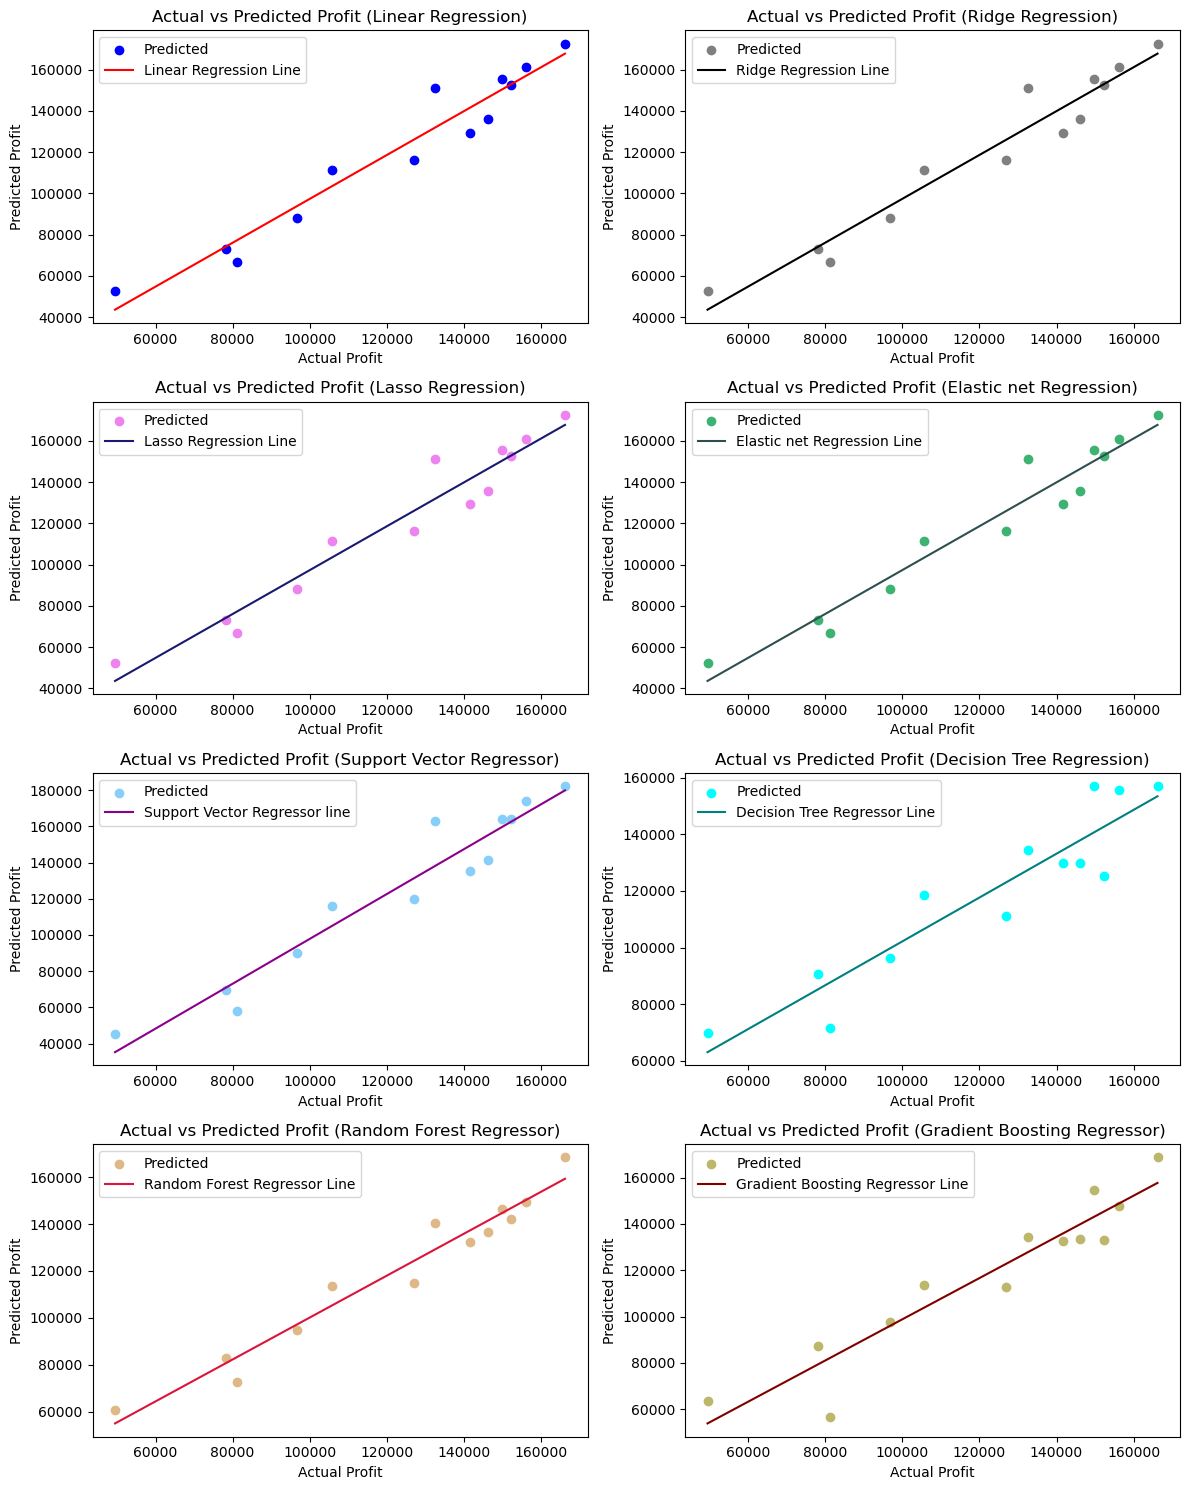

In [59]:
import matplotlib.pyplot as plt
y_test_flat = y_test.values.flatten()
fig, axs = plt.subplots(4, 2, figsize=(12, 15))

"""Linear Regression"""

predicted_values_flat = predicted_values.flatten()
axs[0,0].scatter(y_test_flat, predicted_values_flat, color='blue', marker='o', label='Predicted')
k_1, intercept = np.polyfit(y_test_flat, predicted_values_flat, 1)
x_line = np.linspace(min(y_test_flat), max(y_test_flat), 100)
y_line = k_1 * x_line + intercept
axs[0,0].plot(x_line, y_line, color='red', label='Linear Regression Line')
axs[0,0].set_xlabel('Actual Profit')
axs[0,0].set_ylabel('Predicted Profit')
axs[0,0].set_title('Actual vs Predicted Profit (Linear Regression)')
axs[0,0].legend()

"""Ridge Regression"""

predicted_values_flat_RR = predicted_values_RR.flatten()
axs[0,1].scatter(y_test_flat, predicted_values_flat_RR, color='grey', marker='o', label='Predicted')
k_1, intercept = np.polyfit(y_test_flat, predicted_values_flat_RR, 1)
x_line = np.linspace(min(y_test_flat), max(y_test_flat), 100)
y_line = k_1 * x_line + intercept
axs[0,1].plot(x_line, y_line, color='black', label='Ridge Regression Line')
axs[0,1].set_xlabel('Actual Profit')
axs[0,1].set_ylabel('Predicted Profit')
axs[0,1].set_title('Actual vs Predicted Profit (Ridge Regression)')
axs[0,1].legend()

"""Lasso Regression"""

predicted_values_flat_LAR = predicted_values_LAR.flatten()
axs[1,0].scatter(y_test_flat, predicted_values_flat_LAR, color='Violet', marker='o', label='Predicted')
k_1, intercept = np.polyfit(y_test_flat, predicted_values_flat_LAR, 1)
x_line = np.linspace(min(y_test_flat), max(y_test_flat), 100)
y_line = k_1 * x_line + intercept
axs[1,0].plot(x_line, y_line, color='midnightblue', label='Lasso Regression Line')
axs[1,0].set_xlabel('Actual Profit')
axs[1,0].set_ylabel('Predicted Profit')
axs[1,0].set_title('Actual vs Predicted Profit (Lasso Regression)')
axs[1,0].legend()

"""Elastic net Regression"""

predicted_values_flat_ENR = predicted_values_ENR.flatten()
axs[1,1].scatter(y_test_flat, predicted_values_flat_ENR, color='mediumseagreen', marker='o', label='Predicted')
k_1, intercept = np.polyfit(y_test_flat, predicted_values_flat_ENR, 1)
x_line = np.linspace(min(y_test_flat), max(y_test_flat), 100)
y_line = k_1 * x_line + intercept
axs[1,1].plot(x_line, y_line, color='darkslategrey', label='Elastic net Regression Line')
axs[1,1].set_xlabel('Actual Profit')
axs[1,1].set_ylabel('Predicted Profit')
axs[1,1].set_title('Actual vs Predicted Profit (Elastic net Regression)')
axs[1,1].legend()

"""Support Vector Regressor"""

predicted_values_flat_SVR = predicted_values_SVR.flatten()
axs[2,0].scatter(y_test_flat, predicted_values_flat_SVR, color='lightskyblue', marker='o', label='Predicted')
k_1, intercept = np.polyfit(y_test_flat, predicted_values_flat_SVR, 1)
x_line = np.linspace(min(y_test_flat), max(y_test_flat), 100)
y_line = k_1 * x_line + intercept
axs[2,0].plot(x_line, y_line, color='darkmagenta', label='Support Vector Regressor line')
axs[2,0].set_xlabel('Actual Profit')
axs[2,0].set_ylabel('Predicted Profit')
axs[2,0].set_title('Actual vs Predicted Profit (Support Vector Regressor)')
axs[2,0].legend()

"""Decision Tree Regressor"""

predicted_values_flat_DTR = predicted_values_DTR.flatten()
axs[2,1].scatter(y_test_flat, predicted_values_flat_DTR, color='cyan', marker='o', label='Predicted')
k_1, intercept = np.polyfit(y_test_flat, predicted_values_flat_DTR, 1)
x_line = np.linspace(min(y_test_flat), max(y_test_flat), 100)
y_line = k_1 * x_line + intercept
axs[2,1].plot(x_line, y_line, color='teal', label='Decision Tree Regressor Line')
axs[2,1].set_xlabel('Actual Profit')
axs[2,1].set_ylabel('Predicted Profit')
axs[2,1].set_title('Actual vs Predicted Profit (Decision Tree Regression)')
axs[2,1].legend()

"""Random Forest Regressor"""

predicted_values_flat_RFR = predicted_values_RFR.flatten()
axs[3,0].scatter(y_test_flat, predicted_values_flat_RFR, color='burlywood', marker='o', label='Predicted')
k_1, intercept = np.polyfit(y_test_flat, predicted_values_flat_RFR, 1)
x_line = np.linspace(min(y_test_flat), max(y_test_flat), 100)
y_line = k_1 * x_line + intercept
axs[3,0].plot(x_line, y_line, color='crimson', label='Random Forest Regressor Line')
axs[3,0].set_xlabel('Actual Profit')
axs[3,0].set_ylabel('Predicted Profit')
axs[3,0].set_title('Actual vs Predicted Profit (Random Forest Regressor)')
axs[3,0].legend()

"""Gradient Boosting Regressor"""

predicted_values_flat_GBR = predicted_values_GBR.flatten()
axs[3,1].scatter(y_test_flat, predicted_values_flat_GBR, color='darkkhaki', marker='o', label='Predicted')
k_1, intercept = np.polyfit(y_test_flat, predicted_values_flat_GBR, 1)
x_line = np.linspace(min(y_test_flat), max(y_test_flat), 100)
y_line = k_1 * x_line + intercept
axs[3,1].plot(x_line, y_line, color='maroon', label='Gradient Boosting Regressor Line')
axs[3,1].set_xlabel('Actual Profit')
axs[3,1].set_ylabel('Predicted Profit')
axs[3,1].set_title('Actual vs Predicted Profit (Gradient Boosting Regressor)')
axs[3,1].legend()

plt.tight_layout()
plt.show();

**Thats all for the Prediction of Profit for the dataset 50_startups using different Regression Algorithm.**